https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators


https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/

In [1]:
import warnings  # Importing warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split, RandomizedSearchCV  # To split the data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To standardize the dataset for better model performance

from sklearn.linear_model import LogisticRegression  # For building Logistic Regression models
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier for modeling

# Importing evaluation metrics to assess model performance
from sklearn.metrics import (
    accuracy_score,  # To calculate accuracy
    precision_score,  # To calculate precision
    recall_score,  # To calculate recall
    f1_score,  # To calculate the F1-score
    confusion_matrix,  # To compute the confusion matrix
    ConfusionMatrixDisplay,  # To display the confusion matrix
    precision_recall_curve,
    average_precision_score,
    classification_report,  # To generate a detailed classification report
    make_scorer,  # To customize scoring metrics
    roc_curve,  # To plot the ROC curve
    roc_auc_score,  # To calculate the area under the ROC curve
    PrecisionRecallDisplay # To plot precision-recall curves
    
)

from sklearn.calibration import calibration_curve

# Saving The Best Model and Scaler
import os
import pickle


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# From kaggle dataset
#df= pd.read_csv('/kaggle/input/diabetes-binary-health-indicators-brfss2015/diabetes_binary_health_indicators_BRFSS2015.csv')

In [4]:
df= pd.read_csv('datasets/diabetes_binary_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
df.shape

(253680, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Description of each features

Medical Conditions/Metrics:
- Diabetes_binary: Diabetes status (0: no diabetes, 1: diabetes)
- HighBP: High blood pressure (yes/no)
- HighChol: High cholesterol (yes/no)
- CholCheck: Cholesterol check in past 5 years (yes/no)
- BMI: Body Mass Index
- Stroke: Ever had a stroke (yes/no)
- HeartDiseaseorAttack: History of heart disease/attack (yes/no)

Lifestyle Factors:
- Smoker: Have you smoked 100 cigarettes in your life? (yes/no)
- PhysActivity: Physical activity in past 30 days (yes/no)
- Fruits: Consume fruit 1+ times per day (yes/no)
- Veggies: Consume vegetables 1+ times per day (yes/no)
- HvyAlcoholConsump: Heavy alcohol consumption (yes/no)

Healthcare Access:
- AnyHealthcare: Have any healthcare coverage (yes/no)
- NoDocbcCost: Could not see doctor due to cost (yes/no)

Health Status:
- GenHlth: General health rating (1-5 scale, 1=excellent, 5=poor)
- MentHlth: Days of poor mental health in past 30 days (0-30)
- PhysHlth: Days of poor physical health in past 30 days (0-30)
- DiffWalk: Difficulty walking/climbing stairs (yes/no)

Demographics:
- Sex: Gender
- Age: Age group (categorical)
- Education: Education level
- Income: Income level


# EXPLORATORY DATA ANALYSIS

In [7]:
def Explore_dataset(df):
    print("1. Dataset Dimensions:", df.shape)
    print("\n2. Column Names:\n", df.columns.tolist())
    print("\n3. Summary Info:")
    df.info()
    print("\n4. Missing Values per Column:\n", df.isna().sum())
    print("\n5. Duplicate Rows:", df.duplicated().sum())
    print("\n6. Duplicate Columns:", df.T.duplicated().sum())

    # Detect Outliers
    outlier_counts = {
        col: len(df[(df[col] < df[col].quantile(0.10) - 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10))) |
                    (df[col] > df[col].quantile(0.90) + 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10)))])
        for col in df.select_dtypes(include='number').columns
    }
    print("\n7. Outlier Counts:\n", outlier_counts)


Explore_dataset(df)

1. Dataset Dimensions: (253680, 22)

2. Column Names:
 ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

3. Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivit

In [8]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# DATA VISUALIZATION

In [9]:
df['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [10]:
# Percentage value counts for diabetes_binary
diabetes_counts = df.Diabetes_binary.value_counts(normalize=True) * 100
diabetes_counts

0.0    86.066698
1.0    13.933302
Name: Diabetes_binary, dtype: float64

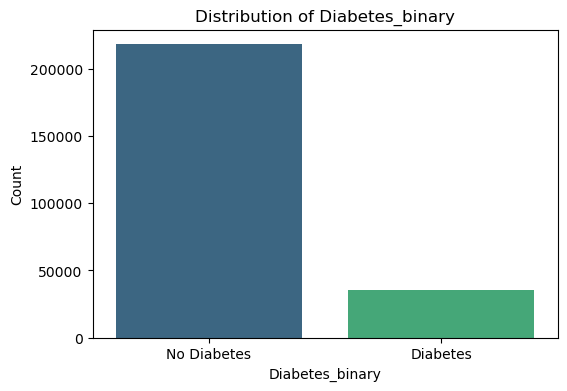

In [11]:
# Class Distribution of the target variable

plt.figure(figsize=(6,4))
sns.countplot(data = df, x='Diabetes_binary', palette='viridis')
plt.title('Distribution of Diabetes_binary')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.ylabel('Count')
plt.show()

This barchart shows the distribution of a binary diabetes classification in a dataset. The chart has two categories:

1. "No Diabetes" (blue bar on the left): This group has approximately 218,334 individuals.
2. "Diabetes" (green bar on the right): This group has approximately 35,346 individuals.


The chart reveals a significant class imbalance in the dataset, with the "No Diabetes" category being about 6 times larger than the "Diabetes" category. This imbalance is common in medical datasets where the condition being studied typically affects a smaller portion of the population.

This class imbalance will be consider when building the predictive models, as it can lead to biased models that perform well on the majority class but poorly on the minority class.

In [12]:
# Demographic Features

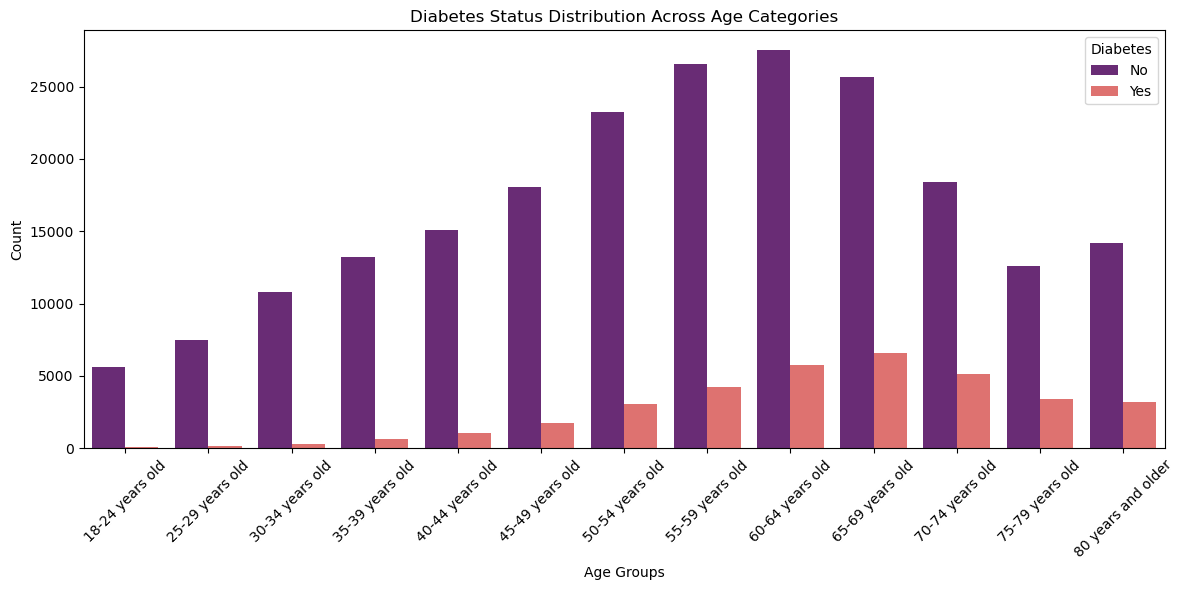

In [13]:
# Visualizing the relationship between Age and Diabetes_binary

# Defining the age mapping dictionary
age_map = {
    1: "18-24 years old",
    2: "25-29 years old",
    3: "30-34 years old",
    4: "35-39 years old",
    5: "40-44 years old",
    6: "45-49 years old",
    7: "50-54 years old",
    8: "55-59 years old",
    9: "60-64 years old",
    10: "65-69 years old",
    11: "70-74 years old",
    12: "75-79 years old",
    13: "80 years and older"
}

# Mapping the numeric Age column to readable age categories
df['Age_groups'] = df['Age'].map(age_map)

# Creating an ordered list of age categories based on the dictionary keys
age_order = [age_map[i] for i in sorted(age_map.keys())]


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age_groups', hue='Diabetes_binary', palette='magma', order=age_order)
plt.title("Diabetes Status Distribution Across Age Categories")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Diabetes", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

The Countplot shows prevalence of Diabetes with Age

**Observations:**
  - Younger age groups (18–39 years) have very low diabetes cases.
  - The proportion of people with diabetes rises significantly from 40–64 years.
  - The highest number of diabetes cases is in the 65–69 and 60–64 age groups.
  - Diabetes prevalence remains high in older groups (70+), but total population size starts declining.
  
**Takeaway:** Age is a major risk factor for diabetes, with prevalence increasing significantly after 40.

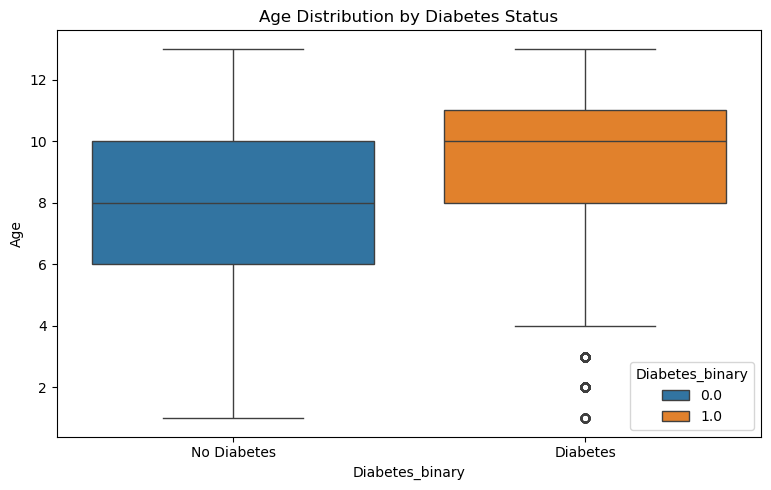

In [14]:
# Age Distribution

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Diabetes_binary', y='Age', hue='Diabetes_binary')
plt.title('Age Distribution by Diabetes Status')

plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

**Interpretation of the Boxplot:**  

**Comparison of Age Distribution:**
 - People with diabetes (right box) tend to be older than those without diabetes (left box).
 - The median age for the diabetes group is higher than for the non-diabetes group.
 
**Spread of Data:**
 - The interquartile range (IQR) is slightly larger for the non-diabetes group, indicating a wider age distribution.
 - The diabetes group has a higher minimum age, meaning fewer young individuals have diabetes.
  
**Takeaway:** Older individuals are more likely to have diabetes.

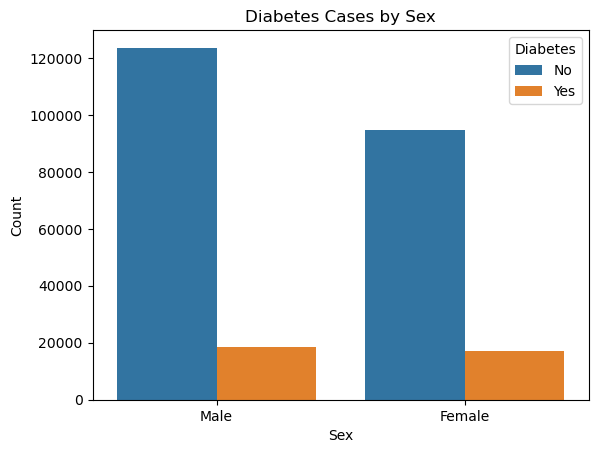

In [15]:
# Countplot to show counts of each Diabetes_binary category grouped by Sex
sns.countplot(data=df, x='Sex', hue='Diabetes_binary')

# Customizing the plot
plt.title('Diabetes Cases by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Replacing numerical Sex labels with 'Male' and 'Female'
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

# Add legend with appropriate labels
plt.legend(title='Diabetes', labels=['No', 'Yes'], loc='best')
plt.show()

**Interpretation:**  
- **More males in the dataset:** The count of non-diabetic males is higher than females.  
- **Similar diabetes rates across sexes:** The number of diabetic cases is nearly the same for males and females.  
- **Takeaway:** While there are more males overall, diabetes affects both sexes at a similar rate.

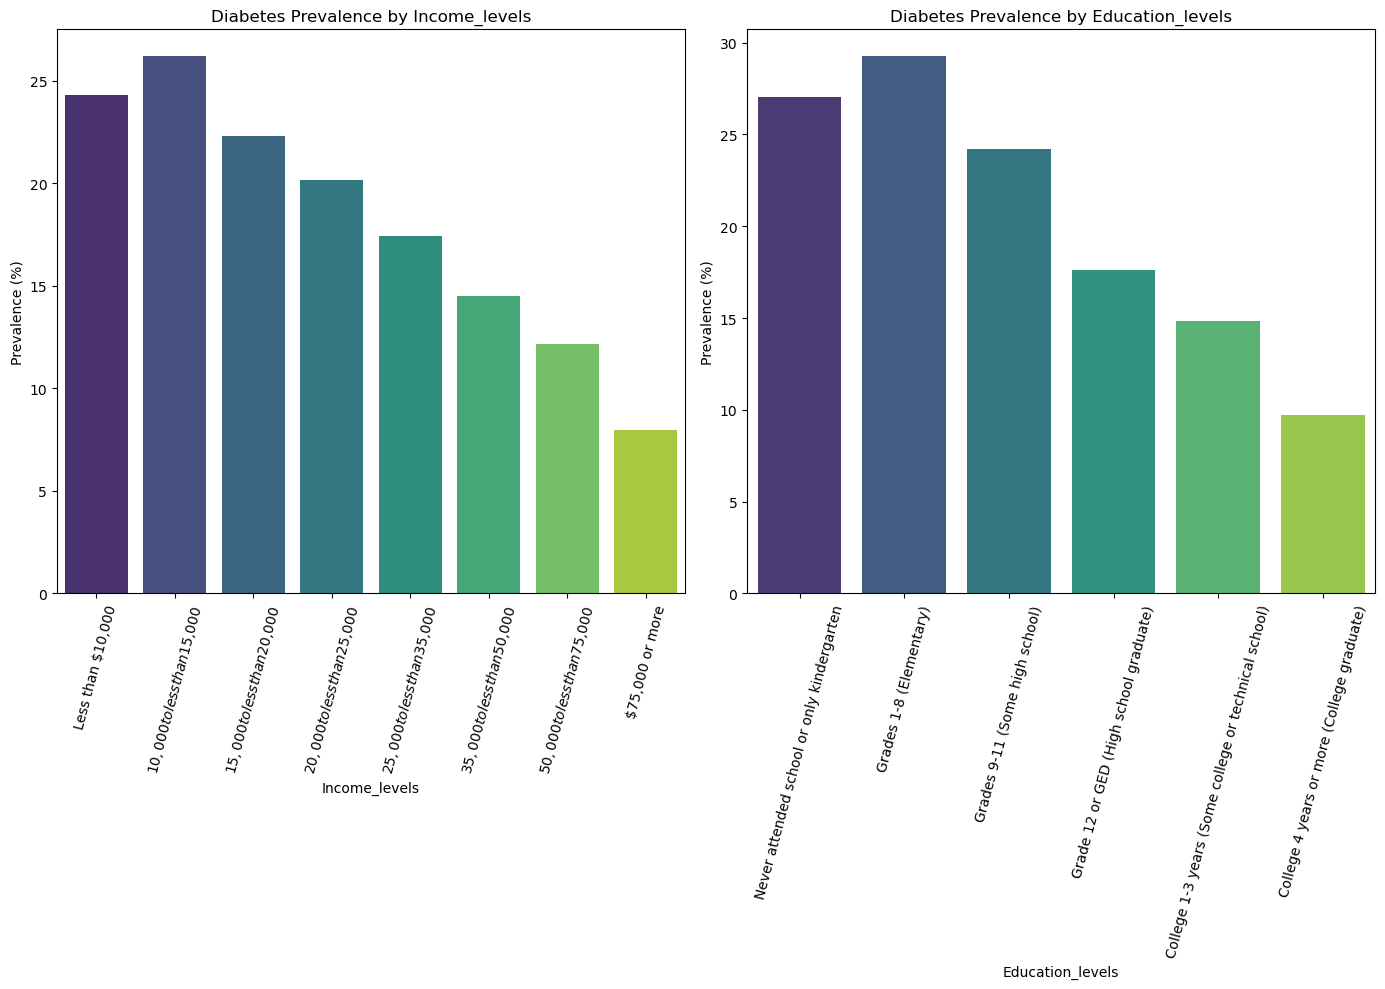

In [16]:
# Defining the income and education mappings dictionary

income_levels = {
    1: "Less than $10,000",
    2: "$10,000 to less than $15,000",
    3: "$15,000 to less than $20,000",
    4: "$20,000 to less than $25,000",
    5: "$25,000 to less than $35,000",
    6: "$35,000 to less than $50,000",
    7: "$50,000 to less than $75,000",
    8: "$75,000 or more"
}

education_levels = {
    1: "Never attended school or only kindergarten",
    2: "Grades 1-8 (Elementary)",
    3: "Grades 9-11 (Some high school)",
    4: "Grade 12 or GED (High school graduate)",
    5: "College 1-3 years (Some college or technical school)",
    6: "College 4 years or more (College graduate)"
}

# Creating Income_levels and Education_levels columns for visualizations
df['Income_levels'] = df['Income'].map(income_levels)
df['Education_levels'] = df['Education'].map(education_levels)


# Defining the sorting order for income_levels and education_levels
income_order = list(income_levels.values())
education_order = list(education_levels.values())

# Creating barplot to visualize Income and Education levels
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

for ax, col, order in zip(axes, ['Income_levels', 'Education_levels'], [income_order, education_order]):
    grp = df.groupby(col)['Diabetes_binary'].mean() * 100  # Calculates prevalence
    grp = grp.reindex(order)  # Reorder bars based on defined order
    
    sns.barplot(x=grp.index, y=grp.values, ax=ax, palette="viridis")
    ax.set(title=f"Diabetes Prevalence by {col}",
           xlabel=col,
           ylabel="Prevalence (%)")
    ax.tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

#### **Interpretation of the Bar Plots**  

**1. Diabetes Prevalence by Income Levels (Left Chart)**
- There is a clear **negative correlation** between income and diabetes prevalence.
- The lowest income group (**Less than 10,000**) has the **highest** diabetes prevalence (~25%).
- As income increases, diabetes prevalence decreases.
- The highest income group (**75,000 or more**) has the **lowest** prevalence (~7-8%).

**Implication:**  
- People with lower income may have limited access to healthcare, healthy food, and preventive measures, leading to higher diabetes rates.
- Higher-income individuals may have better healthcare access and healthier lifestyles, reducing diabetes risk.

---

**2. Diabetes Prevalence by Education Levels (Right Chart)**
- There is a **negative correlation** between education level and diabetes prevalence.
- Those with **less education** (Never attended school or only kindergarten) have the **highest** diabetes prevalence (~27-30%).
- As education levels increase, diabetes prevalence decreases.
- **College graduates** have the **lowest** prevalence (~10%).

**Implication:**  
- Higher education is often linked to better health awareness, dietary choices, and access to healthcare.
- People with lower education levels may have less knowledge about diabetes prevention and management.

---

**Conclusion**
- **Higher income and higher education** are both associated with **lower diabetes prevalence**.
- Socioeconomic factors (income and education) significantly impact health outcomes.
- Public health efforts should target **low-income and low-education groups** to improve diabetes prevention and management strategies.

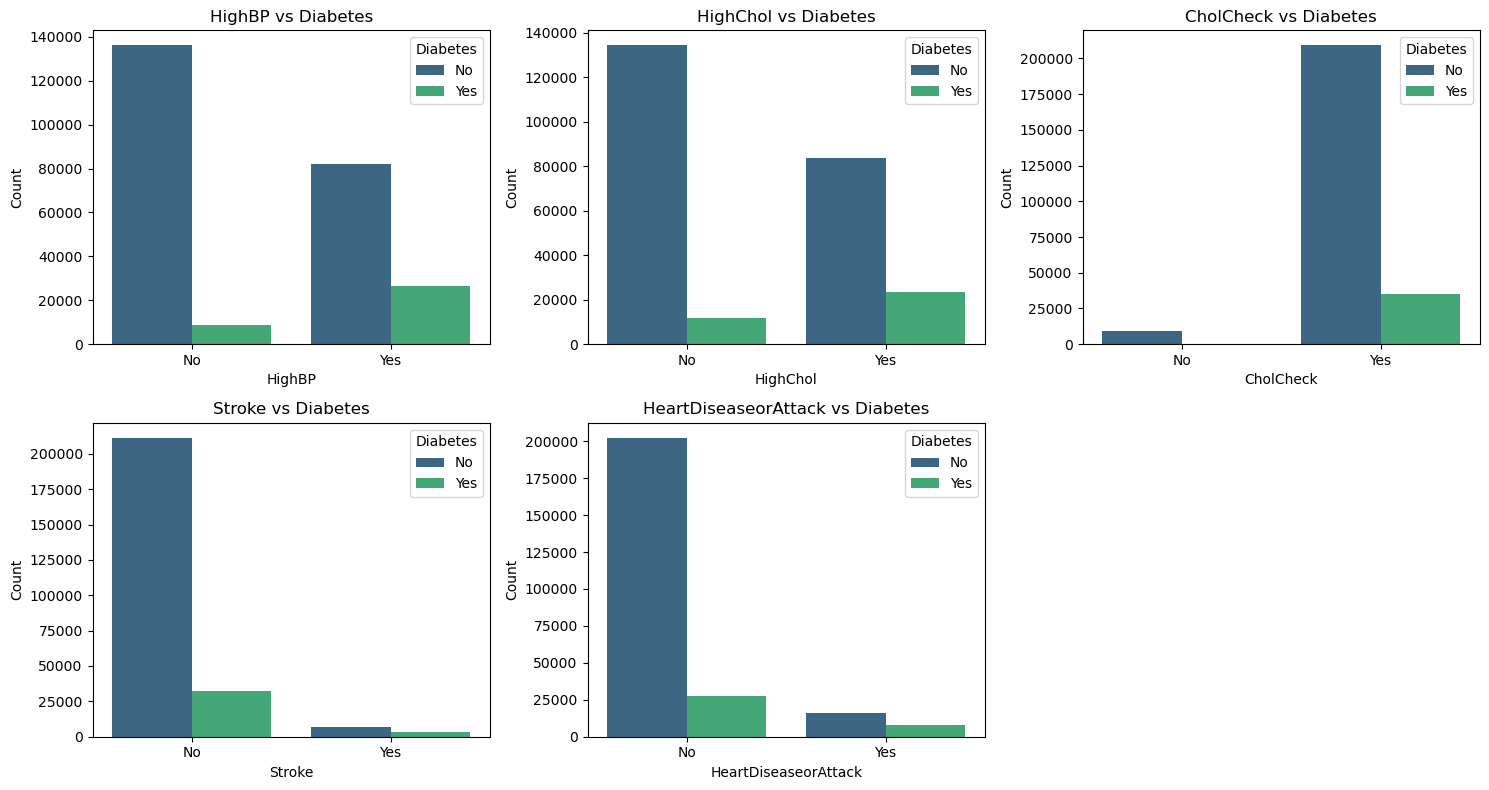

In [17]:

# Defining categorical features.
cardiovascular_conditions = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack']

# Creating subplots: 3 columns per row
n_cols = 3
n_rows = math.ceil(len(cardiovascular_conditions) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cardiovascular_conditions):
    sns.countplot(data=df, x=col, hue='Diabetes_binary', ax=axes[i], palette='viridis')
    axes[i].set_title(f"{col} vs Diabetes")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Diabetes", labels=["No", "Yes"])
    # Setting binary tick labels
    axes[i].set_xticklabels(["No", "Yes"])

# Remove any extra axes if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

These five charts illustrate the relationships between diabetes and various cardiovascular health conditions:

**1. HighBP vs Diabetes (Top Left):**
- Among people without high blood pressure (HighBP=No): Approximately 135,000 don't have diabetes, while about 10,000 do have diabetes.
- Among people with high blood pressure (HighBP=Yes): About 80,000 don't have diabetes, while approximately 25,000 do have diabetes.
- Key insight: The proportion of diabetes is substantially higher in people with high blood pressure (24%) compared to those without (7%).

**2. HighChol vs Diabetes (Top Middle):**
- Among people without high cholesterol (HighChol=No): Around 135,000 don't have diabetes, while about 12,000 do have diabetes.
- Among people with high cholesterol (HighChol=Yes): About 85,000 don't have diabetes, while approximately 25,000 do have diabetes.
- Key insight: Similar to high blood pressure, high cholesterol is associated with a higher proportion of diabetes (~23% vs ~8%).

**3. CholCheck vs Diabetes (Top Right):**
- Among people who haven't had a cholesterol check (CholCheck=No): A very small number (~10,000) don't have diabetes, with minimal diabetes cases.
- Among people who have had a cholesterol check (CholCheck=Yes): About 215,000 don't have diabetes, while approximately 35,000 do have diabetes.
- Key insight: Most people in the dataset have had cholesterol checks, making this comparison less informative about diabetes risk.

**4. Stroke vs Diabetes (Bottom Left):**
- Among people with no history of stroke (Stroke=No): About 210,000 don't have diabetes, while approximately 30,000 do have diabetes.
- Among people with history of stroke (Stroke=Yes): Very few people in both categories (~10,000 without diabetes, minimal with diabetes).
- Key insight: While the overall stroke prevalence is low, the charts suggest diabetes cases are mostly concentrated in people without stroke history.

**5. HeartDiseaseorAttack vs Diabetes (Bottom Right):**
- Among people without heart disease/attack history (No): About 200,000 don't have diabetes, while approximately 28,000 do have diabetes.
- Among people with heart disease/attack history (Yes): About 15,000 don't have diabetes, while approximately 10,000 do have diabetes.
- Key insight: The proportion of diabetes is notably higher in people with heart disease/attack history (~40%) compared to those without (~12%).

**Overall patterns:**
1. Cardiovascular risk factors (high blood pressure, high cholesterol) show strong associations with diabetes.
2. The prevalence of diabetes is consistently higher in populations with cardiovascular conditions.
3. Heart disease/attack shows the strongest proportional relationship with diabetes among all conditions shown.
4. The data suggests important clinical connections between diabetes and cardiovascular health that could inform screening and prevention strategies.

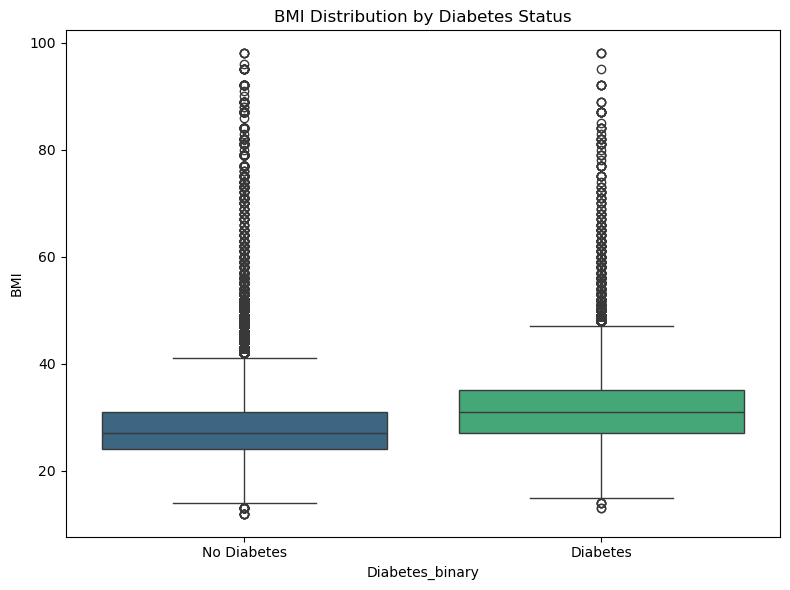

In [18]:
# Analyzing BMI relationship with Diabetes_binary


# Plot BMI (continuous) using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='viridis')
plt.title("BMI Distribution by Diabetes Status")
# plt.xlabel("Diabetes")
plt.ylabel("BMI")
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.tight_layout()
plt.show()

This box plot shows the distribution of BMI (Body Mass Index) values comparing people with and without diabetes.

Key observations:

1. **Higher median BMI in diabetic group**: The median BMI (represented by the horizontal line inside each box) is noticeably higher in people with diabetes (green box, approximately 32-33) compared to those without diabetes (blue box, approximately 27-28).

2. **Interquartile range (IQR)**: The boxes represent the middle 50% of BMI values. The diabetes group has a wider box, suggesting greater variability in BMI values among diabetic individuals. The IQR for the diabetes group appears to be roughly between 27-35, while for the non-diabetes group it's roughly between 23-30.

3. **Overall range**: Both groups have similar minimum values (around 13-15) and maximum non-outlier values (around 45-47). This indicates that while very low and very high BMIs can occur in both populations, the typical distribution is shifted higher in diabetic individuals.

4. **Outliers**: Both groups show numerous outliers (individual circles) above the upper whisker, indicating some individuals with extremely high BMIs (up to 95-98) in both groups. These represent unusual cases that fall outside the normal distribution pattern.

5. **Clinical significance**: The clear shift toward higher BMI values in the diabetes group aligns with established medical knowledge that overweight and obesity are significant risk factors for type 2 diabetes. However, the overlapping distributions also show that diabetes occurs across the BMI spectrum.

This visualization demonstrates the association between higher BMI and diabetes while also showing that BMI alone is not a perfect predictor, as there's substantial overlap between the two distributions.

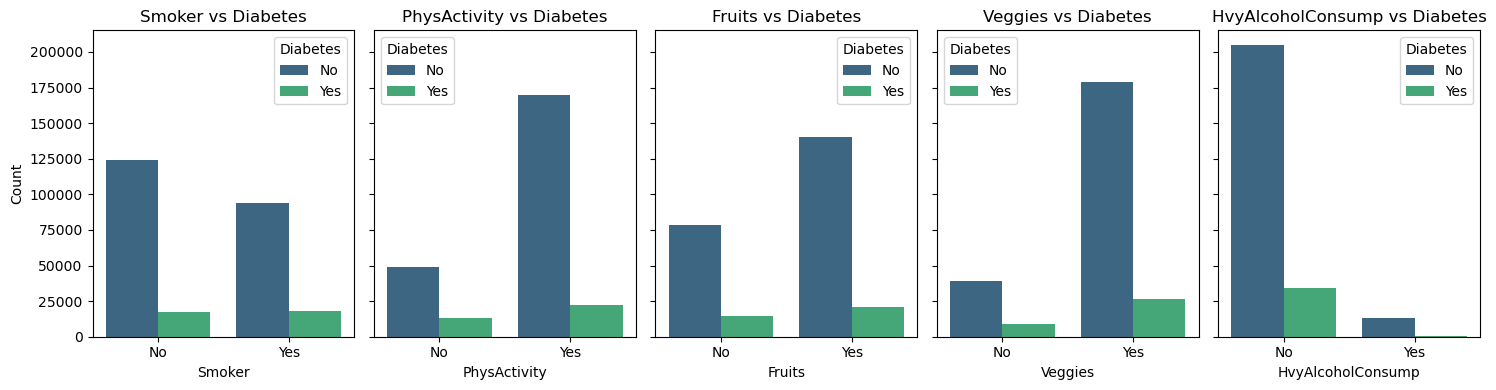

In [19]:
lifestyle_features = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

fig, axes = plt.subplots(1, len(lifestyle_features), figsize=(15, 4), sharey=True)

for ax, col in zip(axes, lifestyle_features):
    sns.countplot(data=df, x=col, hue='Diabetes_binary', ax=ax, palette='viridis')
    ax.set_title(f"{col} vs Diabetes")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(title="Diabetes", labels=["No", "Yes"])
    ax.set_xticklabels(["No", "Yes"])
    
plt.tight_layout()
plt.show()

**Interpretation of the Count Plots**  

Each subplot compares different lifestyle factors with diabetes prevalence, categorized as "Yes" (diabetic) and "No" (non-diabetic). 

**1. Smoker vs Diabetes (First Plot):** Both smokers and non-smokers have a significant number of people without diabetes. The number of diabetics appears similar in both groups. Smoking does not show a strong direct correlation with diabetes in this dataset, Smoking does not appear to be a risk factor of Diabetes.

**2. Physical Activity vs Diabetes (Second Plot):** People who engage in **physical activity** have a **lower** count of diabetics compared to those who do not. The inactive group has a **higher** proportion of diabetics.

**Implication:** Regular physical activity may **reduce** the risk of diabetes. Lack of exercise is a **strong** risk factor for diabetes.

**3. Fruits Consumption vs Diabetes (Third Plot):** People who **consume fruits** have a **lower** prevalence of diabetes than those who do not. Those who do not eat fruits regularly have a **higher** proportion of diabetics.

**Implication:** Eating fruits might help in **diabetes prevention**, possibly due to their fiber and nutrient content.

**4. Vegetables Consumption vs Diabetes (Fourth Plot):** Similar to fruits, those who **eat vegetables** have **fewer diabetics** than those who do not. People who **don’t consume vegetables** have a **higher** prevalence of diabetes.

**Implication:** Regular consumption of vegetables might **reduce diabetes risk**, likely due to fiber, vitamins, and lower calorie intake.

**5. Heavy Alcohol Consumption vs Diabetes (Fifth Plot):** Most people **do not consume alcohol heavily**. Among **heavy alcohol consumers**, there are **fewer diabetics**. However, this could be due to fewer overall heavy drinkers in the dataset.

**Implication:** The relationship between heavy alcohol consumption and diabetes might not be direct. Other lifestyle factors (e.g., physical activity, diet) might play a more significant role.

**Overall Conclusion**
- **Physical inactivity, low fruit/vegetable intake, and poor lifestyle choices are associated with higher diabetes prevalence.**
- **Physical activity, fruit, and vegetable consumption appear to be protective factors against diabetes.**
- **Smoking and heavy alcohol consumption show mixed relationships, possibly due to other influencing factors.**

**Public Health Takeaway:**  
Encouraging **regular exercise, a healthy diet rich in fruits and vegetables, and active lifestyles** could help reduce diabetes prevalence.

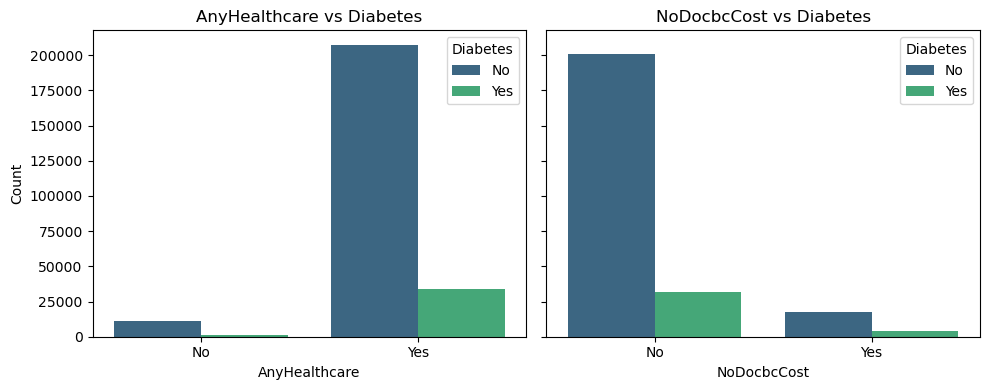

In [20]:
healthcare_access = ['AnyHealthcare', 'NoDocbcCost']

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for ax, col in zip(axes, healthcare_access):
    sns.countplot(data=df, x=col, hue='Diabetes_binary', ax=ax, palette='viridis')
    ax.set_title(f"{col} vs Diabetes")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(title="Diabetes", labels=["No", "Yes"])
    ax.set_xticklabels(["No", "Yes"])
    

plt.tight_layout()
plt.show()


These two charts show healthcare access patterns among people with and without diabetes:

1. **AnyHealthcare vs Diabetes**:
   - The vast majority of both diabetic and non-diabetic individuals have some form of healthcare access (labeled "Yes")
   - Among those with healthcare access, about 14% have diabetes
   - Very few people overall lack healthcare access, but the proportion of diabetes is slightly higher in this group

2. **NoDocbcCost vs Diabetes**:
   - This chart shows whether people avoided doctor visits due to cost
   - Most people (both diabetic and non-diabetic) did not avoid doctor visits due to cost (labeled "No")
   - Among those who did avoid doctor visits due to cost (labeled "Yes"), the proportion with diabetes is lower
   - About 12% of those who didn't avoid doctor visits have diabetes, compared to about 7% of those who did

These patterns suggest that people with diabetes generally have healthcare access and are less likely to avoid medical care due to cost concerns, possibly reflecting the necessity of regular medical care for diabetes management.

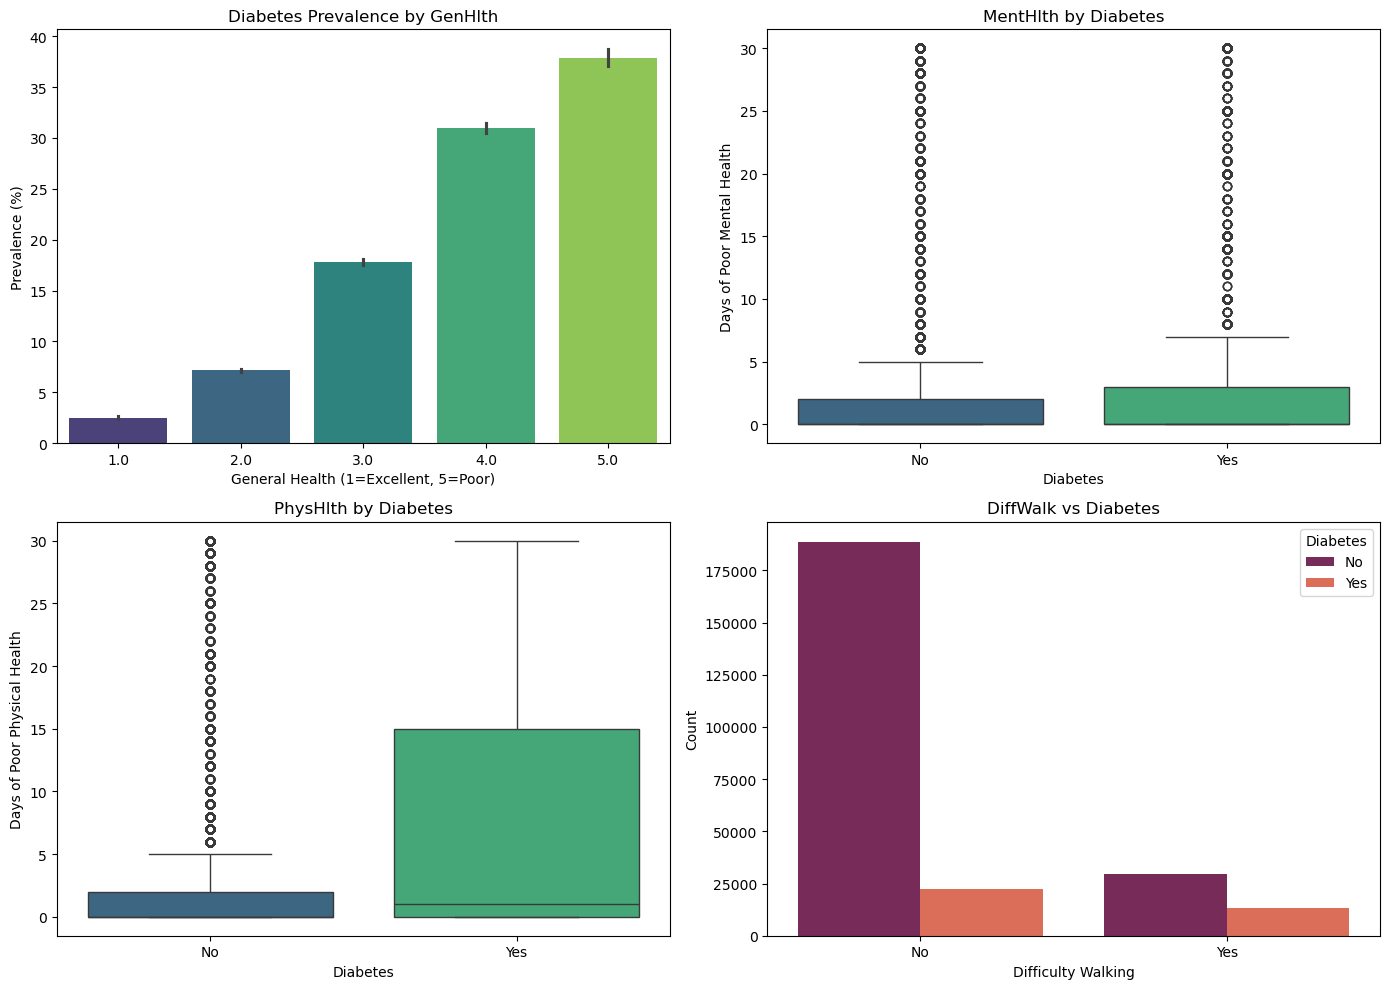

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# GenHlth: Diabetes prevalence by health rating
sns.barplot(x=df['GenHlth'], y=df['Diabetes_binary'] * 100, ax=axes[0, 0], palette="viridis")
axes[0, 0].set(title="Diabetes Prevalence by GenHlth", xlabel="General Health (1=Excellent, 5=Poor)", ylabel="Prevalence (%)")

# MentHlth: Boxplot of poor mental health days
sns.boxplot(x=df['Diabetes_binary'], y=df['MentHlth'], ax=axes[0, 1], palette="viridis")
axes[0, 1].set(title="MentHlth by Diabetes", xlabel="Diabetes", ylabel="Days of Poor Mental Health")
axes[0, 1].set_xticklabels(["No", "Yes"])

# PhysHlth: Boxplot of poor physical health days
sns.boxplot(x=df['Diabetes_binary'], y=df['PhysHlth'], ax=axes[1, 0], palette="viridis")
axes[1, 0].set(title="PhysHlth by Diabetes", xlabel="Diabetes", ylabel="Days of Poor Physical Health")
axes[1, 0].set_xticklabels(["No", "Yes"])

# DiffWalk: Countplot for walking difficulty
sns.countplot(x=df['DiffWalk'], hue=df['Diabetes_binary'], ax=axes[1, 1], palette="rocket")
axes[1, 1].set(title="DiffWalk vs Diabetes", xlabel="Difficulty Walking", ylabel="Count")
axes[1, 1].legend(title="Diabetes", labels=["No", "Yes"])
axes[1, 1].set_xticklabels(["No", "Yes"])

plt.tight_layout()
plt.show()


These four charts reveal key relationships between diabetes and health metrics:

1. **Diabetes by General Health (Top Left):**
   Diabetes prevalence increases dramatically as self-reported health worsens, from only ~2.5% in those reporting excellent health to ~38% in those reporting poor health—a 15-fold difference.

2. **Mental Health Days by Diabetes (Top Right):**
   Both diabetic and non-diabetic groups show similar patterns of poor mental health days, with comparable medians near zero and similar distributions of outliers. The relationship between diabetes and mental health appears relatively weak.

3. **Physical Health Days by Diabetes (Bottom Left):**
   People with diabetes report substantially more days of poor physical health, with a higher median and much wider distribution compared to those without diabetes, indicating a strong association between diabetes and physical health problems.

4. **Difficulty Walking vs. Diabetes (Bottom Right):**
   Diabetes prevalence is more than twice as high (26%) among people with walking difficulties compared to those without (~12%), highlighting the impact of diabetes on mobility.

Together, these visualizations show that diabetes correlates strongly with poorer physical health outcomes and functional limitations, with a less pronounced relationship to mental health challenges.

In [22]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Age_groups', 'Income_levels', 'Education_levels'],
      dtype='object')

# PREPROCESSING

In [23]:
df.duplicated().sum()

24206

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

# FEATURE SELECTION

I will consider how each individual features correlate with the target variable, their mutual information scores, and domain knowledge in season the features.

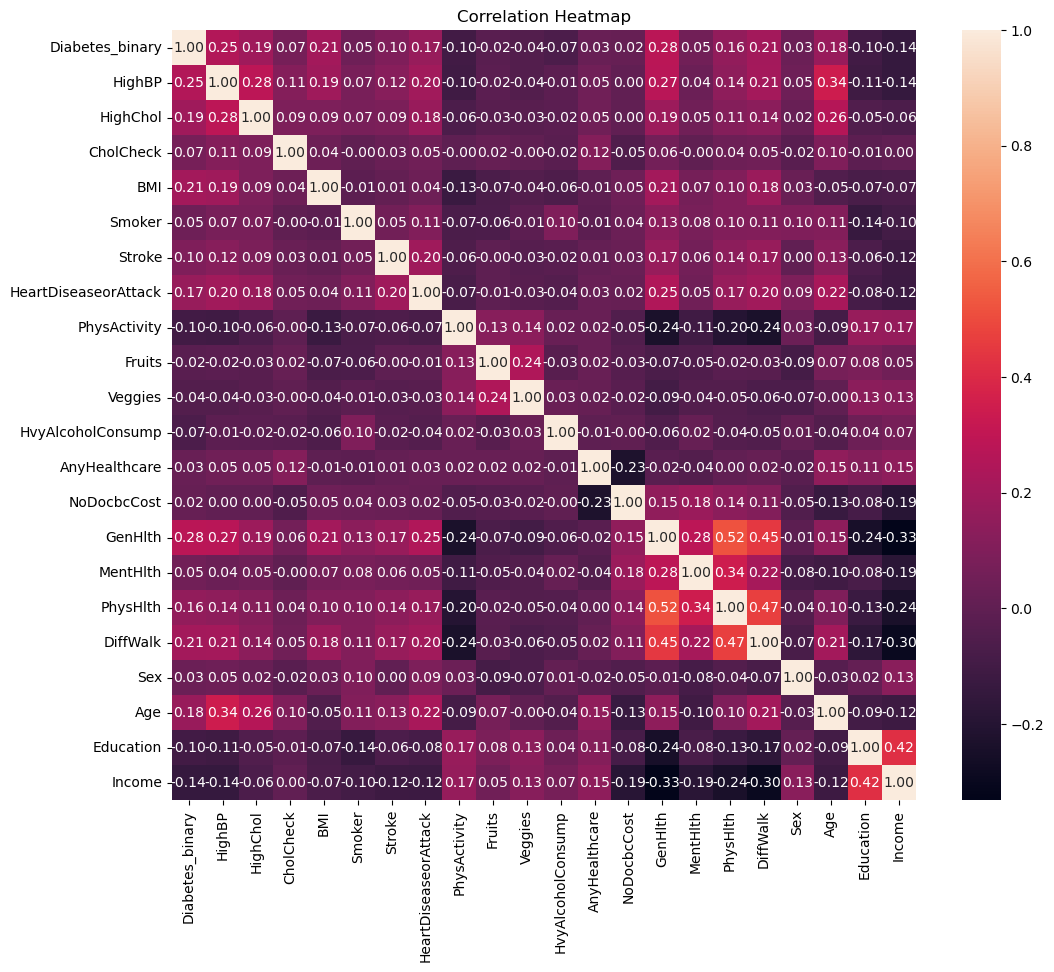

In [26]:
## Correlation matrix
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Interpretation of the Correlation Heatmap**  

This heatmap shows the correlation between various health and demographic factors, with diabetes (**Diabetes_binary**) as the main focus. Correlation values range from **-1 to 1**, where: 
- **1 (lightest color)** = Perfect positive correlation (strong relationship)  
- **-1 (darkest color)** = Perfect negative correlation (inverse relationship)  
- **0 (middle shade)** = No correlation  


**Observations:**

**1. Strongest Correlations with Diabetes (Diabetes_binary)**
- **High Blood Pressure (HighBP) → 0.25**  
  - Moderate positive correlation: People with high blood pressure are more likely to have diabetes.  
- **Age → 0.34**  
  - Strongest correlation: Older individuals are more likely to have diabetes.  
- **General Health (GenHlth) → 0.28**  
  - Poorer self-reported health is associated with diabetes.  
- **Difficulty Walking (DiffWalk) → 0.21**  
  - Diabetes is associated with mobility issues.  

#### **2. Weak to Moderate Correlations**
- **Physical Activity (PhysActivity) → -0.10**  
  - Negative correlation: More physically active individuals have a lower chance of diabetes.  
- **Fruits Consumption (Fruits) → -0.02**  
  - Very weak negative correlation: Slight protective effect against diabetes.  
- **Vegetables Consumption (Veggies) → -0.04**  
  - Similar weak negative correlation as fruits.  

#### **3. Other Health Factors**
- **Heart Disease/Attack → 0.20**  
  - Having a history of heart disease moderately correlates with diabetes.  
- **BMI → 0.19**  
  - Higher BMI is slightly associated with diabetes.  
- **High Cholesterol (HighChol) → 0.18**  
  - Moderate correlation: People with high cholesterol may also have diabetes.  

**4. Socioeconomic Factors**
- **Income → -0.14**  
  - Negative correlation: Higher income is associated with a lower likelihood of diabetes.  
- **Education → -0.10**  
  - Negative correlation: Higher education levels are linked to lower diabetes risk.  

**5. Insignificant or Weak Correlations**
- **Smoking (Smoker) → 0.07** (weak)  
- **Heavy Alcohol Consumption (HvyAlcoholConsum) → -0.03** (almost no correlation)  
- **Mental Health (MentHlth) → 0.05** (very weak)  


**Conclusion**  
- **Age, high blood pressure, general health, and difficulty walking** have the **strongest positive correlations** with diabetes.  
- **Physical activity, income, and education** show **negative correlations**, meaning they may help **reduce** diabetes risk.  
- **Dietary factors (fruits & veggies) and alcohol consumption have weak correlations**, suggesting that other lifestyle or genetic factors may play a stronger role in diabetes risk.  



In [27]:
# Removing Multicolinearity from the features if they exist

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation(df,0.70)
corr_features

set()

In [28]:
# Removing highly correlated features if any exists
df = df.drop(columns=corr_features)

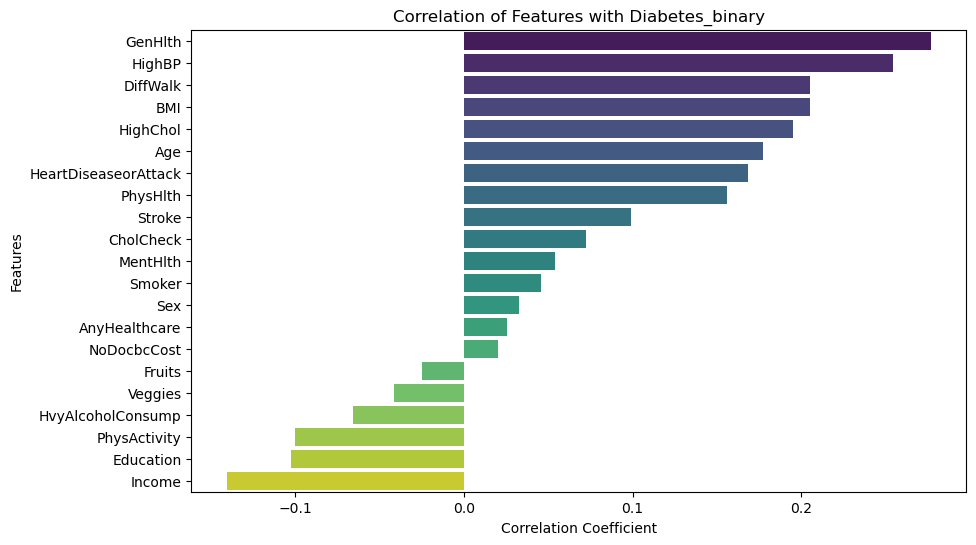

In [29]:
# Compute correlation matrix and select correlation with 'Diabetes_binary'
correlations = df.corr()['Diabetes_binary'].drop('Diabetes_binary')
correlations = correlations.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlation of Features with Diabetes_binary')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Based on the coreletion relationship with the target GenHlth, HighBP, BMI, DiffWalk,  HighChol, Age,
HeartDiseaseorAttack, PhysHlth, Stroke, CholCheck, MentHlth, Smoker, Sex.

I would also pick HvyAlcoholConsump, PhysActivity, Education, Income because of their negative correlation.


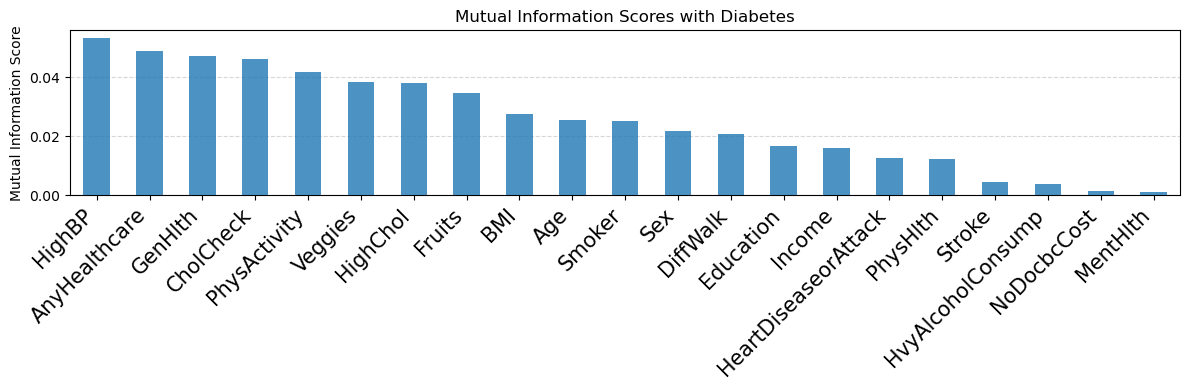


Mutual Information Scores:
HighBP                  0.053111
AnyHealthcare           0.048867
GenHlth                 0.047245
CholCheck               0.046077
PhysActivity            0.041692
Veggies                 0.038357
HighChol                0.037820
Fruits                  0.034549
BMI                     0.027674
Age                     0.025577
Smoker                  0.025227
Sex                     0.021620
DiffWalk                0.020861
Education               0.016576
Income                  0.015952
HeartDiseaseorAttack    0.012578
PhysHlth                0.012225
Stroke                  0.004540
HvyAlcoholConsump       0.003935
NoDocbcCost             0.001662
MentHlth                0.001191
dtype: float64


In [30]:
# Using mutual information score

cat_features = ['Age_groups', 'Income_levels', 'Education_levels']
df = df.drop(columns=cat_features)
# Calculate mutual information scores

X = df.drop('Diabetes_binary', axis=1)  # Features
y = df['Diabetes_binary']  # Target

mi_scores = mutual_info_classif(X, y)

# Create a Series with feature names and their MI scores
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

# Create the visualization
plt.figure(figsize=(12, 4))
mi_series.plot(kind='bar', alpha=0.8, zorder=3)
plt.title("Mutual Information Scores with Diabetes")
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation=45, ha='right', size=15)
plt.ylabel('Mutual Information Score')
plt.tight_layout()
plt.show()

# Print the scores
print("\nMutual Information Scores:")
print(mi_series)

In [31]:
# Features selected by both methods

feature_correlation = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age',
         'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'CholCheck', 'MentHlth', 
         'Smoker', 'Sex', 'HvyAlcoholConsump', 'PhysActivity', 'Education', 'Income']

mutual_information = ['HighBP', 'GenHlth', 'AnyHealthcare', 'CholCheck', 'PhysActivity', 
         'HighChol', 'Fruits', 'Veggies', 'BMI', 'Age', 'Smoker', 'DiffWalk', 'Sex']


# Combine lists and remove duplicates using set
combined_set = set(feature_correlation + mutual_information)

# Convert back to list for ordered representation
combined_features = list(combined_set)

print("Combined unique features as a list:")
print(combined_features)
print("\nNumber of unique features:", len(combined_features))

Combined unique features as a list:
['Sex', 'Veggies', 'DiffWalk', 'BMI', 'GenHlth', 'Income', 'PhysActivity', 'Education', 'PhysHlth', 'Stroke', 'MentHlth', 'Age', 'HighChol', 'HighBP', 'Fruits', 'AnyHealthcare', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'Smoker', 'CholCheck']

Number of unique features: 20


In [32]:
# Making Final Feature Selection With Domain Knowledge
selected_features = ['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke', 
                     'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity', 
                     'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol', 
                     'Veggies', 'Education', 'Age', 'HighBP', 'Fruits', 'Diabetes_binary']

In [33]:
df = df[selected_features]

In [34]:
df.columns

Index(['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke',
       'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity',
       'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol',
       'Veggies', 'Education', 'Age', 'HighBP', 'Fruits', 'Diabetes_binary'],
      dtype='object')

In [35]:
# Separating features (X) and target (y) for 

X = df.drop("Diabetes_binary",axis=1)
y = df["Diabetes_binary"]

In [36]:
"""Splitted the dataset to prevent data leakages when carrying out and Scaling"""

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, stratify=df['Diabetes_binary'], random_state=42 )

# """Splitted the dataset to prevent data leakages when carrying out and Scaling"""

# # Splitting the data into training and testing datasets
# = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)

In [37]:
X_train.columns

Index(['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke',
       'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity',
       'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol',
       'Veggies', 'Education', 'Age', 'HighBP', 'Fruits'],
      dtype='object')

In [38]:
y_train.value_counts()

0.0    155501
1.0     28078
Name: Diabetes_binary, dtype: int64

In [39]:
# Standardizing the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling Completed!")

Scaling Completed!


In [40]:
feature_names = X_train.columns
feature_names

Index(['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke',
       'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity',
       'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol',
       'Veggies', 'Education', 'Age', 'HighBP', 'Fruits'],
      dtype='object')

In [41]:
# Convert scaled data back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test = pd.DataFrame(X_test_scaled, columns=feature_names)

# Now X_train_scaled_df and X_test_scaled_df are DataFrames with column names

In [42]:
X_train.head()

,PhysHlth,HvyAlcoholConsump,Smoker,CholCheck,Stroke,GenHlth,MentHlth,Sex,Income,BMI,PhysActivity,HeartDiseaseorAttack,AnyHealthcare,DiffWalk,HighChol,Veggies,Education,Age,HighBP,Fruits
0,-0.517047,-0.254765,1.072035,0.205176,-0.215734,-0.563578,-0.455262,1.13290,0.529942,-0.395435,0.601961,-0.338755,-4.187359,-0.477229,-0.889095,0.509271,0.020709,-0.350440,1.096408,-1.256327
1,-0.517047,-0.254765,-0.932805,0.205176,-0.215734,0.375330,-0.455262,-0.88269,-1.381726,0.786628,0.601961,-0.338755,0.238814,-0.477229,1.124739,0.509271,-0.986375,0.620283,1.096408,-1.256327
2,-0.517047,-0.254765,-0.932805,0.205176,-0.215734,-0.563578,-0.455262,-0.88269,1.007859,-0.690951,0.601961,-0.338755,0.238814,-0.477229,1.124739,0.509271,1.027793,0.620283,-0.912069,0.795971
3,-0.517047,-0.254765,-0.932805,0.205176,-0.215734,-0.563578,-0.455262,-0.88269,-0.425892,-0.986467,0.601961,-0.338755,0.238814,-0.477229,1.124739,0.509271,0.020709,1.591006,-0.912069,0.795971
4,0.698722,-0.254765,-0.932805,0.205176,-0.215734,1.314239,-0.455262,-0.88269,-0.425892,0.195596,0.601961,-0.338755,0.238814,2.095428,-0.889095,0.509271,-0.986375,-0.350440,1.096408,0.795971


In [43]:
from imblearn.over_sampling import SMOTE  # To handle class imbalance by oversampling the minority class


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verifying the class distribution after balancing
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution before SMOTE: Counter({0.0: 155501, 1.0: 28078})
Class distribution after SMOTE: Counter({0.0: 155501, 1.0: 155501})


In [44]:
len(X_train_balanced)

311002

# MODELLING AND PREDICTIONS

In [100]:
# Initialing, training and predicting with a Logisitc Regression model
lr = LogisticRegression( random_state=42)

lr.fit(X_train_balanced, y_train_balanced)
y_pred = lr.predict(X_test)


In [50]:
#  Confusion Matrix Display function

def plot_confusion_matrix(y_test, y_pred, model_name="Model"):
    cm = confusion_matrix(y_test, y_pred)
    labels = [["True Negative", "False Positive"], 
              ["False Negative", "True Positive"]]
    percent = cm / cm.sum() * 100
    
    annotations = np.array([[f"{label}\n{val}\n({p:.1f}%)" 
                            for label, val, p in zip(row, vals, prow)] 
                          for row, vals, prow in zip(labels, cm, percent)])
    
    sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Accuracy: 0.72
Weighted Precision: 0.85
Weighted Recall: 0.72
Weighted F1 Score: 0.75

              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38876
         1.0       0.32      0.76      0.45      7019

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.72      0.75     45895


[[27524 11352]
 [ 1708  5311]]


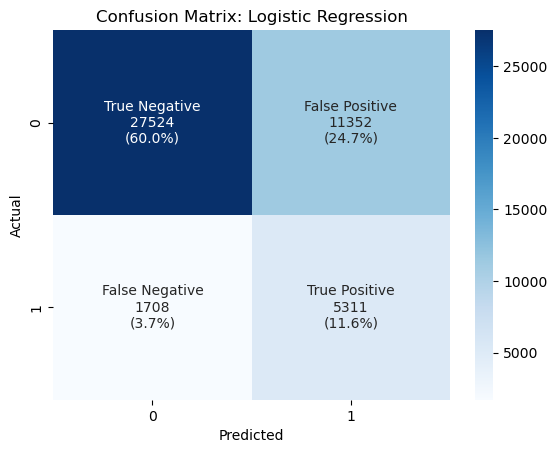

In [102]:
# Evaluation Metrics for Logistics Regression model

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print()
print(classification_report(y_test, y_pred))

print()
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")

In [105]:
# Importing, Initializng, training and predicting with a GaussianNB model


from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb.fit(X_train_balanced, y_train_balanced)
gnb_ypred = gnb.predict(X_test)

Accuracy: 0.69
Weighted Precision: 0.84
Weighted Recall: 0.69
Weighted F1 Score: 0.74

              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     38876
         1.0       0.30      0.75      0.43      7019

    accuracy                           0.69     45895
   macro avg       0.62      0.72      0.61     45895
weighted avg       0.84      0.69      0.74     45895


[[26625 12251]
 [ 1763  5256]]


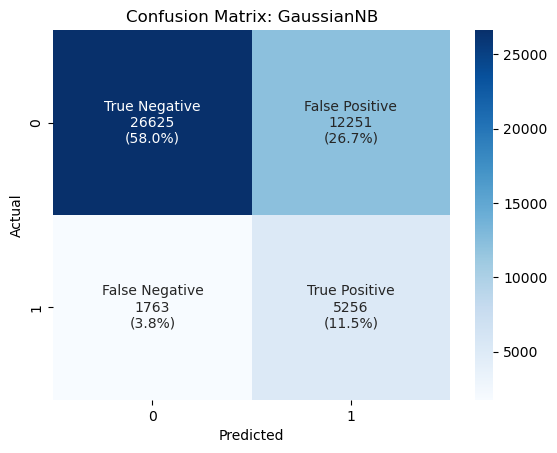

In [106]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, gnb_ypred):.2f}")
print(f"Weighted Precision: {precision_score(y_test, gnb_ypred, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, gnb_ypred, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, gnb_ypred, average='weighted'):.2f}")
print()
print(classification_report(y_test, gnb_ypred))

print()
print(confusion_matrix(y_test, gnb_ypred))
plot_confusion_matrix(y_test, gnb_ypred, "GaussianNB")

In [107]:
# Importing compute_class_weight to calculate class imbalanced

from sklearn.utils.class_weight import compute_class_weight

# Calculate class imbalance ratio
class_weights = compute_class_weight("balanced", classes=np.unique(y), y=y)
scale_pos_weight = class_weights[1] / class_weights[0]  # Ratio of majority to minority class

In [108]:
scale_pos_weight

5.538279625039177

In [46]:
import xgboost as xgb

Accuracy: 0.70
Weighted Precision: 0.85
Weighted Recall: 0.70
Weighted F1 Score: 0.74

              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79     38876
         1.0       0.31      0.80      0.45      7019

    accuracy                           0.70     45895
   macro avg       0.63      0.74      0.62     45895
weighted avg       0.85      0.70      0.74     45895


[[26421 12455]
 [ 1432  5587]]


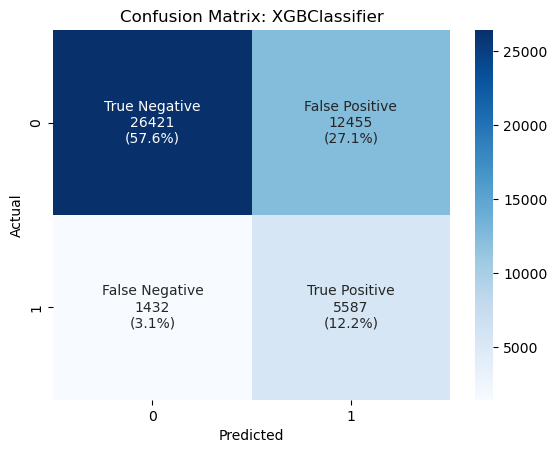

In [109]:
# Importing, Initializng, training and predicting with a xgboost model
import xgboost as xgb

xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric="logloss", use_label_encoder=False)
xgb_model.fit(X_train_balanced, y_train_balanced)
xgb_preds = xgb_model.predict(X_test)

# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, xgb_preds):.2f}")
print(f"Weighted Precision: {precision_score(y_test, xgb_preds, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, xgb_preds, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, xgb_preds, average='weighted'):.2f}")
print()
print(classification_report(y_test, xgb_preds))

print()
print(confusion_matrix(y_test, xgb_preds))
plot_confusion_matrix(y_test, xgb_preds, "XGBClassifier")

# HYPERPARAMETER TUNING AND CROSS-VALIDATION

In [ ]:
# Logistic Regression

In [113]:
# Logistic Regression hyperparameters
param_distributions_lr = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2 penalties
}

# Number of parameter settings that are sampled
n_iter_search = 20

# Number of cross-validation folds
cv = 5

In [114]:

# Setuping RandomizedSearchCV

# Logistic Regression
lr = LogisticRegression()
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_distributions_lr,
    n_iter=n_iter_search,
    cv=cv,
    random_state=42,
    n_jobs=-1
)
random_search_lr.fit(X_train_balanced, y_train_balanced)
print("Best Logistic Regression Parameters:", random_search_lr.best_params_)
print("Best Logistic Regression CV Score:", random_search_lr.best_score_)


Best Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.0018329807108324356}
Best Logistic Regression CV Score: 0.7398666427908155


Accuracy: 0.71
Weighted Precision: 0.85
Weighted Recall: 0.71
Weighted F1 Score: 0.75

              precision    recall  f1-score   support

         0.0       0.94      0.70      0.81     38876
         1.0       0.32      0.76      0.45      7019

    accuracy                           0.71     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.71      0.75     45895


[[27397 11479]
 [ 1679  5340]]


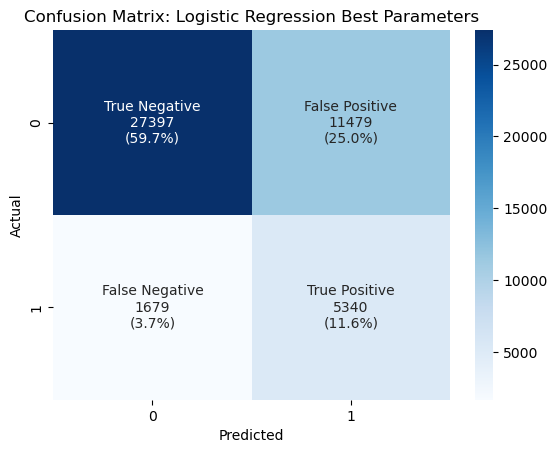

In [115]:
# Evaluate the best model on the test set
best_lr = random_search_lr.best_estimator_

y_pred_lr = best_lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.2f}")
print()
print(classification_report(y_test, y_pred_lr))

print()
print(confusion_matrix(y_test,y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Best Parameters")

In [45]:
from xgboost import XGBClassifier # Importing XGBClassifier

In [ ]:
# Hyperparameter Tuning for XGBClassifier

In [110]:
from xgboost import XGBClassifier # Importing XGBClassifier
from sklearn.model_selection import RandomizedSearchCV # Using RandomizedSearchCV

# Defining parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_grid, 
    n_iter=20,  # Try 20 different combinations
    scoring='roc_auc', 
    cv=5, 
    verbose=2, 
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_balanced, y_train_balanced)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Best model evaluation
best_xgb = random_search.best_estimator_
print("Best XGBoost Model Score:", best_xgb.score(X_test, y_test))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best Score: 0.9585319748120332
Best XGBoost Model Score: 0.6561499073973199


In [111]:
# Best Model Prediction
y_pred_xgb = best_xgb.predict(X_test)

Accuracy: 0.66
Weighted Precision: 0.86
Weighted Recall: 0.66
Weighted F1 Score: 0.70

              precision    recall  f1-score   support

         0.0       0.96      0.62      0.75     38876
         1.0       0.29      0.85      0.43      7019

    accuracy                           0.66     45895
   macro avg       0.62      0.74      0.59     45895
weighted avg       0.86      0.66      0.70     45895


[[24151 14725]
 [ 1056  5963]]


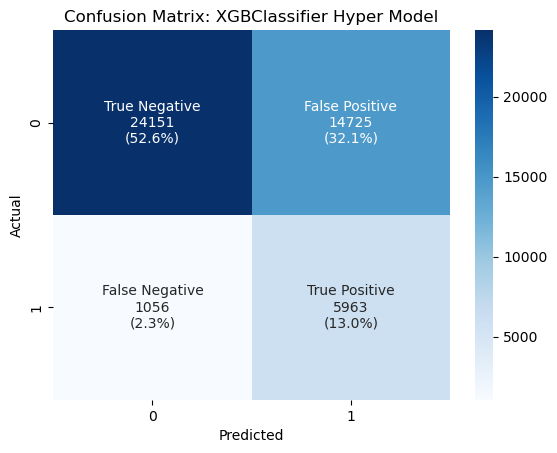

In [112]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred_xgb, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred_xgb, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted'):.2f}")
print()
print(classification_report(y_test, y_pred_xgb))

print()
print(confusion_matrix(y_test, y_pred_xgb))
plot_confusion_matrix(y_test, y_pred_xgb, "XGBClassifier Hyper Model")

In [122]:
# Creating a folder to save the best models if it doesn't exist
save_folder = "saved_models"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Saving the model using pickle
with open(os.path.join(save_folder, "diabetes_prediction.pkl"), "wb") as file:
    pickle.dump(best_lr, file)    

# Saving the scaler
with open(os.path.join(save_folder, "scaler.pkl"), "wb") as file:
    pickle.dump(scaler, file)

print(f"Model saved successfully in the '{save_folder}' folder.\n")

Model saved successfully in the 'saved_models' folder.



In [47]:
# Loading the saved model
save_folder = "saved_models/"
model_path = os.path.join(save_folder, "diabetes_prediction_xgb_2.pkl")

with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")

Model loaded successfully!


In [48]:
# Prediction with the loaded model
load_pred = loaded_model.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.96      0.62      0.75     38876
         1.0       0.29      0.85      0.43      7019

    accuracy                           0.66     45895
   macro avg       0.62      0.74      0.59     45895
weighted avg       0.86      0.66      0.70     45895



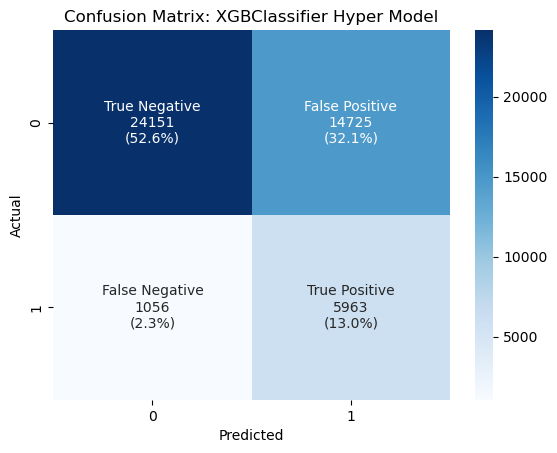

In [51]:
# Evaluating the loaded model
print(classification_report(y_test, load_pred))
plot_confusion_matrix(y_test, load_pred, "XGBClassifier Hyper Model")

# MODEL VISUALIZATIONS

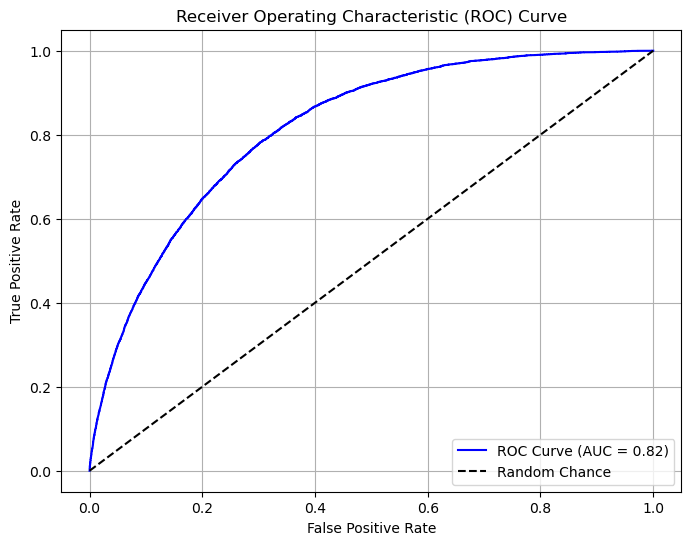

In [52]:
# 1 ROC-Curve

# Predicted probabilities
y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

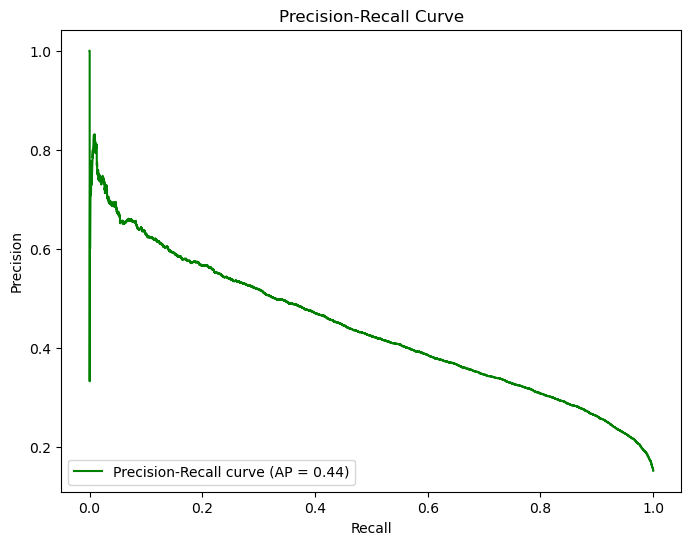

In [53]:
# 2. Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green', label=f"Precision-Recall curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

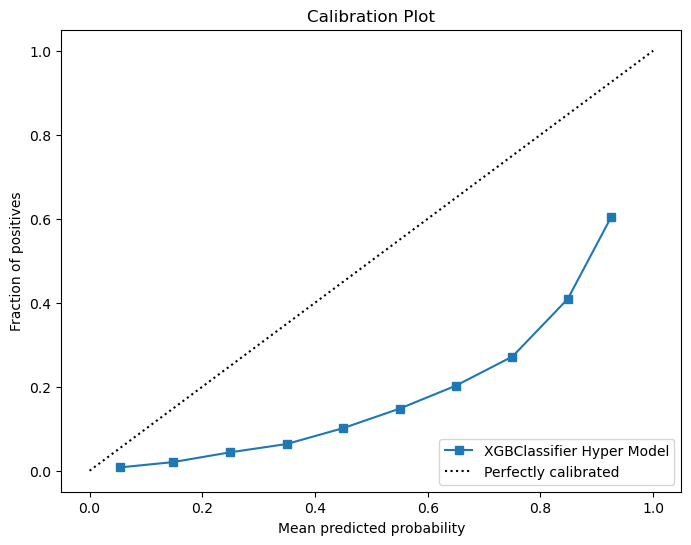

In [54]:
# 3. Calibration Plot
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8,6))
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="XGBClassifier Hyper Model")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Plot")
plt.legend(loc="lower right")
plt.show()

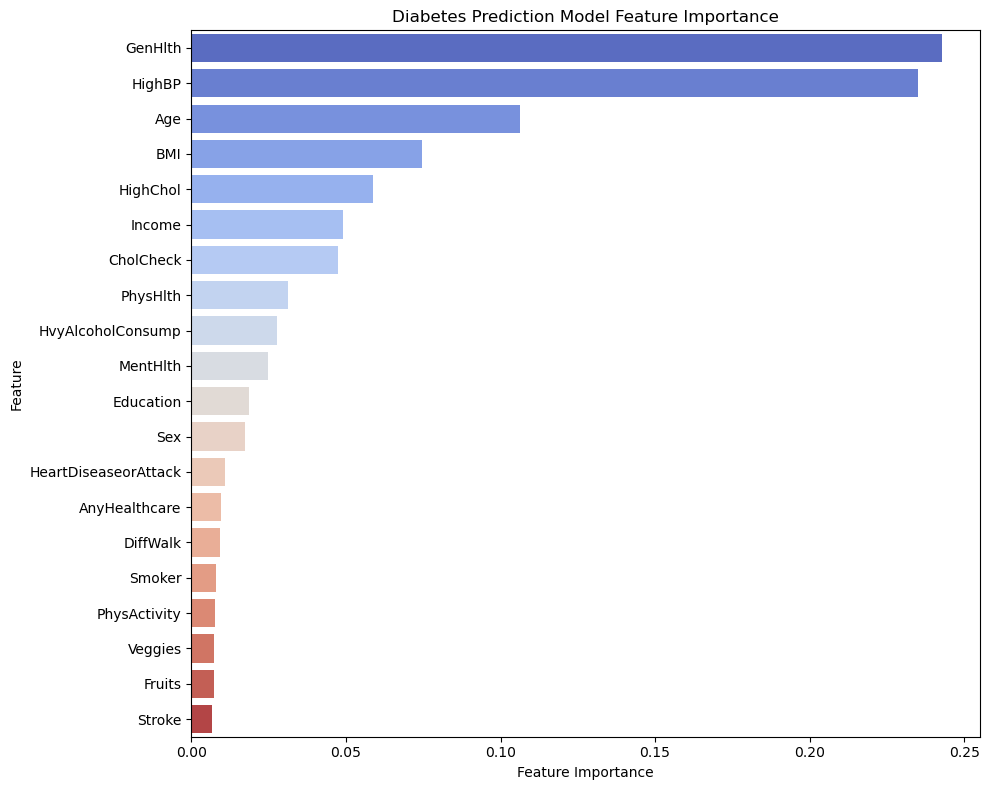

In [63]:
# 4. Feature Importance

feature_names = X.columns

# Get feature importances from the XGBoost model
importances = loaded_model.feature_importances_

# Create a DataFrame with feature names and their importance
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Create an ordered list of features (highest importance first)
ordered_features = feature_importance_df["Feature"].tolist()

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=feature_importance_df, 
    x="Importance", 
    y="Feature", 
    palette="coolwarm", 
    order=ordered_features
)
ax.set_title("Diabetes Prediction Model Feature Importance")
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.show()

In [64]:
feature_importance_df

,Feature,Importance
5,GenHlth,0.242886
18,HighBP,0.234915
17,Age,0.106419
9,BMI,0.074442
14,HighChol,0.058795
8,Income,0.049025
3,CholCheck,0.047359
0,PhysHlth,0.031200
1,HvyAlcoholConsump,0.027844
6,MentHlth,0.024650
